# Kaggle TMDB 5000 Movie Dataset
## Graphical analysis of the Tmbd (kaggle) data-set with 4.803 entries 

In [ ]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import fastparquet
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Zusätzliche Bibliotheken aus https://www.kaggle.com/code/sadeghjalalian/imdb-best-movies-analysis-recommender-system
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
#from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.figure_factory as ff
import collections

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')



In [3]:
import pandas as pd
kaggle_movies = pd.read_parquet("../input/parquet_files/kaggle_tmdb.parquet")

In [4]:
kaggle_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year'],
      dtype='object')

## Vote average 

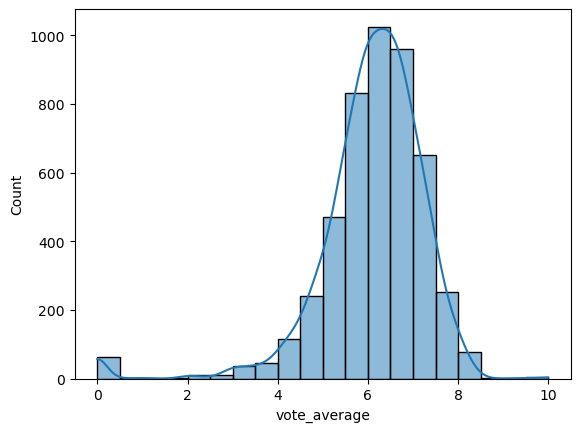

In [17]:
hplot_ratings = sns.histplot(kaggle_movies["vote_average"], bins=20, kde=True)

In [36]:

year_grp = kaggle_movies.groupby("release_year").agg( { "vote_count" : "size"} )


In [37]:
year_grp.sample(5)

vote_count
release_year            
1977                  16
2005                 217
2006                 237
2016                 104
1937                   2

## Year of release

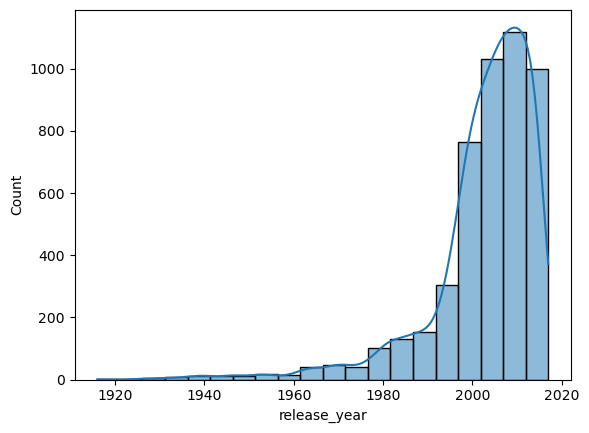

In [26]:

hplot_ratings = sns.histplot(kaggle_movies["release_year"], bins=20, kde=True)

## Compared to imDB data set

In [48]:
# Import Data 

movies = pd.read_parquet("../movies.parquet", engine='fastparquet')
movies = movies.replace("", np.nan)

In [49]:
# Remove Unwanted Numbers
movies["year_cln"] = movies["year"].replace(r"[^0-9]", np.nan, regex = True)
movies = movies.dropna(subset = "year_cln")

In [50]:
# Convert to INT
sorted(movies["year_cln"].unique().tolist())
movies["year_cln"].info()

<class 'pandas.core.series.Series'>
Index: 391782 entries, 0 to 633718
Series name: year_cln
Non-Null Count   Dtype 
--------------   ----- 
391782 non-null  object
dtypes: object(1)
memory usage: 6.0+ MB


TypeError: 'str' object is not callable

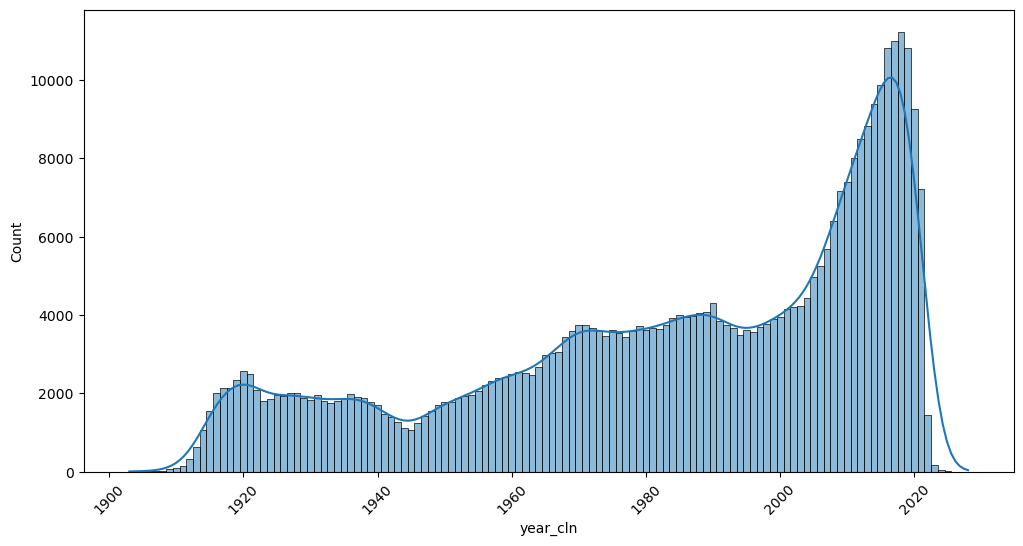

In [51]:
movies["year_cln"] = movies["year_cln"].astype(int)

plt.figure(figsize=(12, 6))  # Breite/Höhe anpassen
#bin_edges = np.linspace(1903, 2028, num=50)  # 50 gleichmäßige Gruppen  

hplot_ratings = sns.histplot(movies["year_cln"], bins=40, kde=True, discrete=True)

# Achsen-Labeling optimieren
plt.xticks(rotation=45)  # Drehe die Jahreswerte für bessere Lesbarkeit
plt.xlabel("Jahr")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Jahre (1903-2028)")

plt.show()

## TMDB dataset analysis

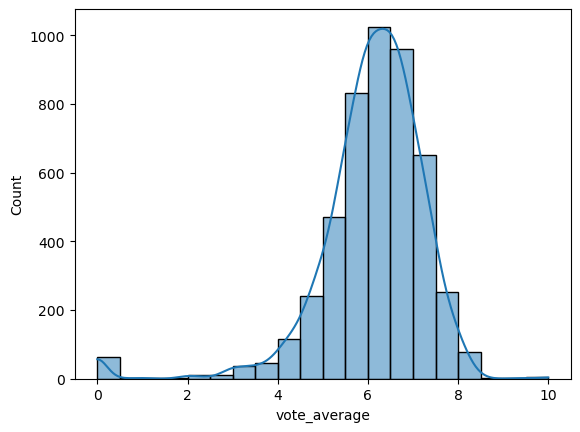

In [5]:
hplot_ratings = sns.histplot(kaggle_movies["vote_average"], bins=20, kde=True)

## Density of IMDb Rating Vs. Release Year

In [8]:
kaggle_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year'],
      dtype='object')

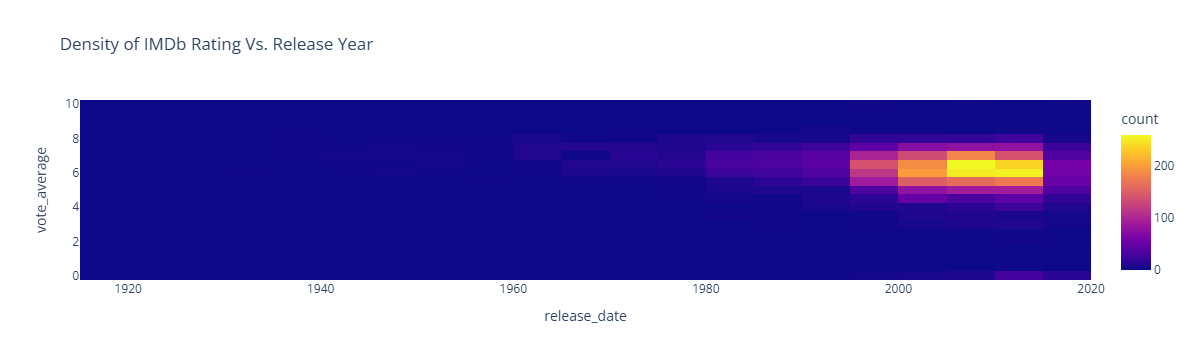

In [13]:
fig = px.density_heatmap(kaggle_movies, x="release_date", y="vote_average", title = 'Density of IMDb Rating Vs. Release Year')
fig.show()

## Votes per Year

In [39]:
## Number of Ratings per release year
vote_per_year = kaggle_movies.groupby("release_year").agg({"vote_count":"sum"} )

# Dieser Ansatz funktioniert nicht, weil wohl der Index einbezogen wird: 
# vote_per_year = kaggle_movies[["release_date", "vote_count"]].sort_values(by = "release_date")

In [40]:
vote_per_year.head(5)

vote_count
release_year            
1916                  60
1925                  21
1927                 657
1929                  64
1930                  19

Text(11.472222222222216, 0.5, 'Total Movies')

<Figure size 1600x800 with 0 Axes>

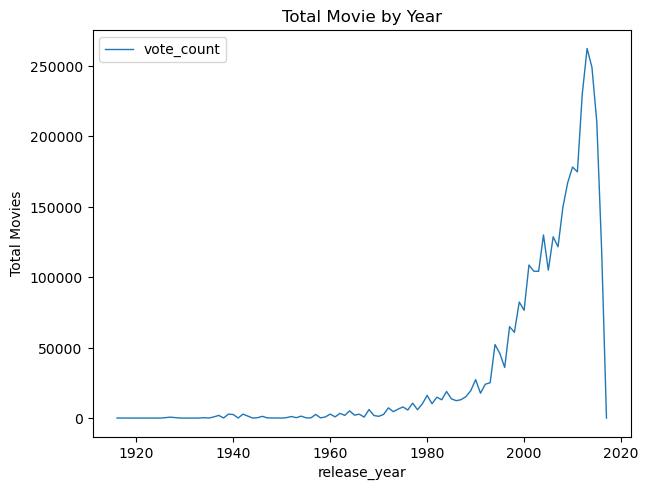

In [54]:
plt.figure(figsize=(16,8))
vote_per_year.plot(linewidth=1)
plt.tight_layout()
plt.title('Total Movie by Year')
plt.ylabel("Total Movies")

In [59]:
movie_per_yr = kaggle_movies.groupby( ["release_year"] ).agg( {"title" : "count"} )
movie_per_yr

title
release_year       
1916              1
1925              1
1927              1
1929              2
1930              1
...             ...
2013            231
2014            238
2015            216
2016            104
2017              1

[90 rows x 1 columns]

AttributeError: Rectangle.set() got an unexpected keyword argument 'rotation'

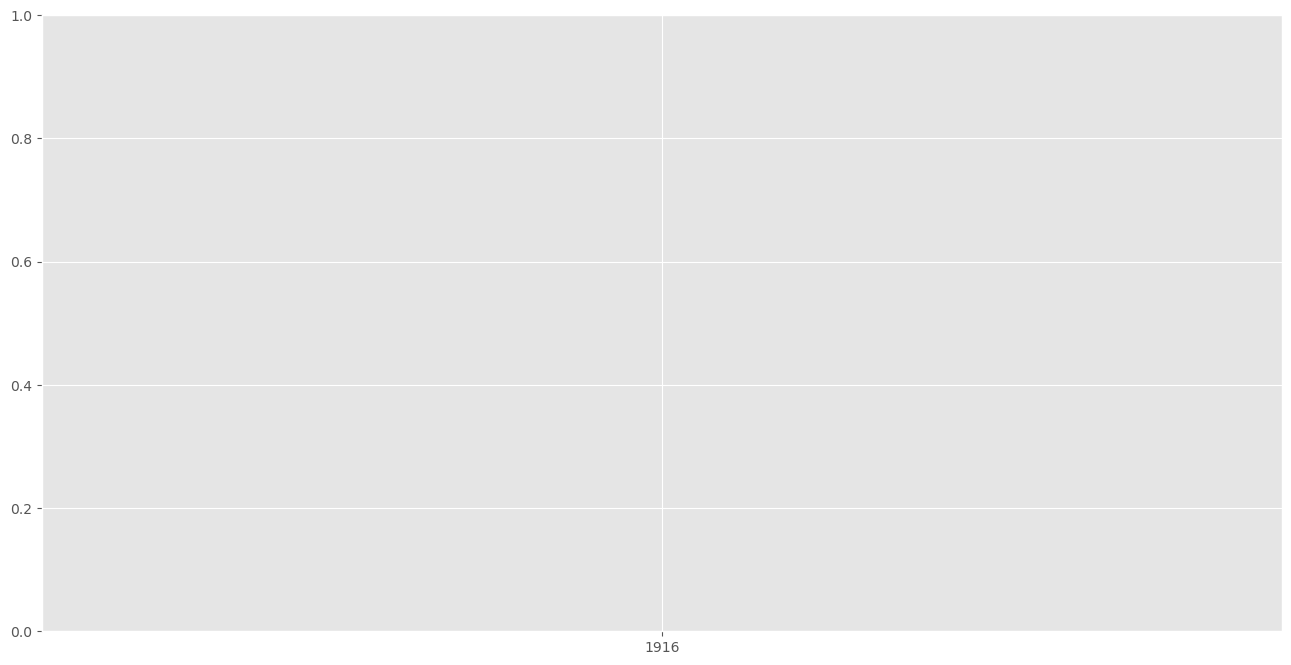

In [123]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x = movie_per_yr.index, y = movie_per_yr["title"], hue = movie_per_yr.index)
plt.show()

## Top Movies

In [13]:
kaggle_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year'],
      dtype='object')

### Top Movies: "standard" rating.

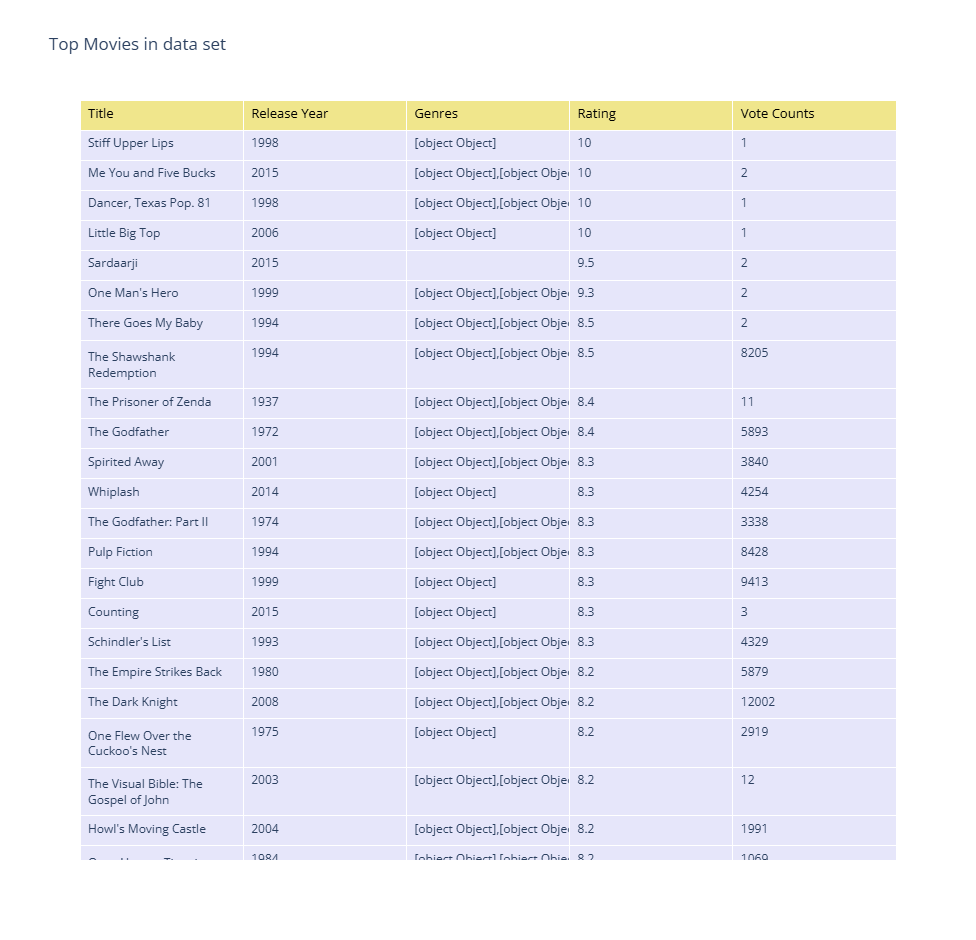

In [15]:
toprated = kaggle_movies[[ "title", "release_year", "genres", "vote_average", "vote_count" ]].sort_values(by = "vote_average", ascending=False)

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year', "Genres", 'Rating', 'Vote Counts'],fill_color='Khaki',height=30,align='left',font=dict(color='black', size=13)),
                              cells = dict(values=[toprated['title'], toprated['release_year'], toprated['genres'], toprated['vote_average'], toprated['vote_count']],fill_color='lavender',height=30,align='left'))])
fig.update_layout(height=940, width=850, title_text="Top Movies in data set")
fig.show()

### Top Movies: "weighted" rating.

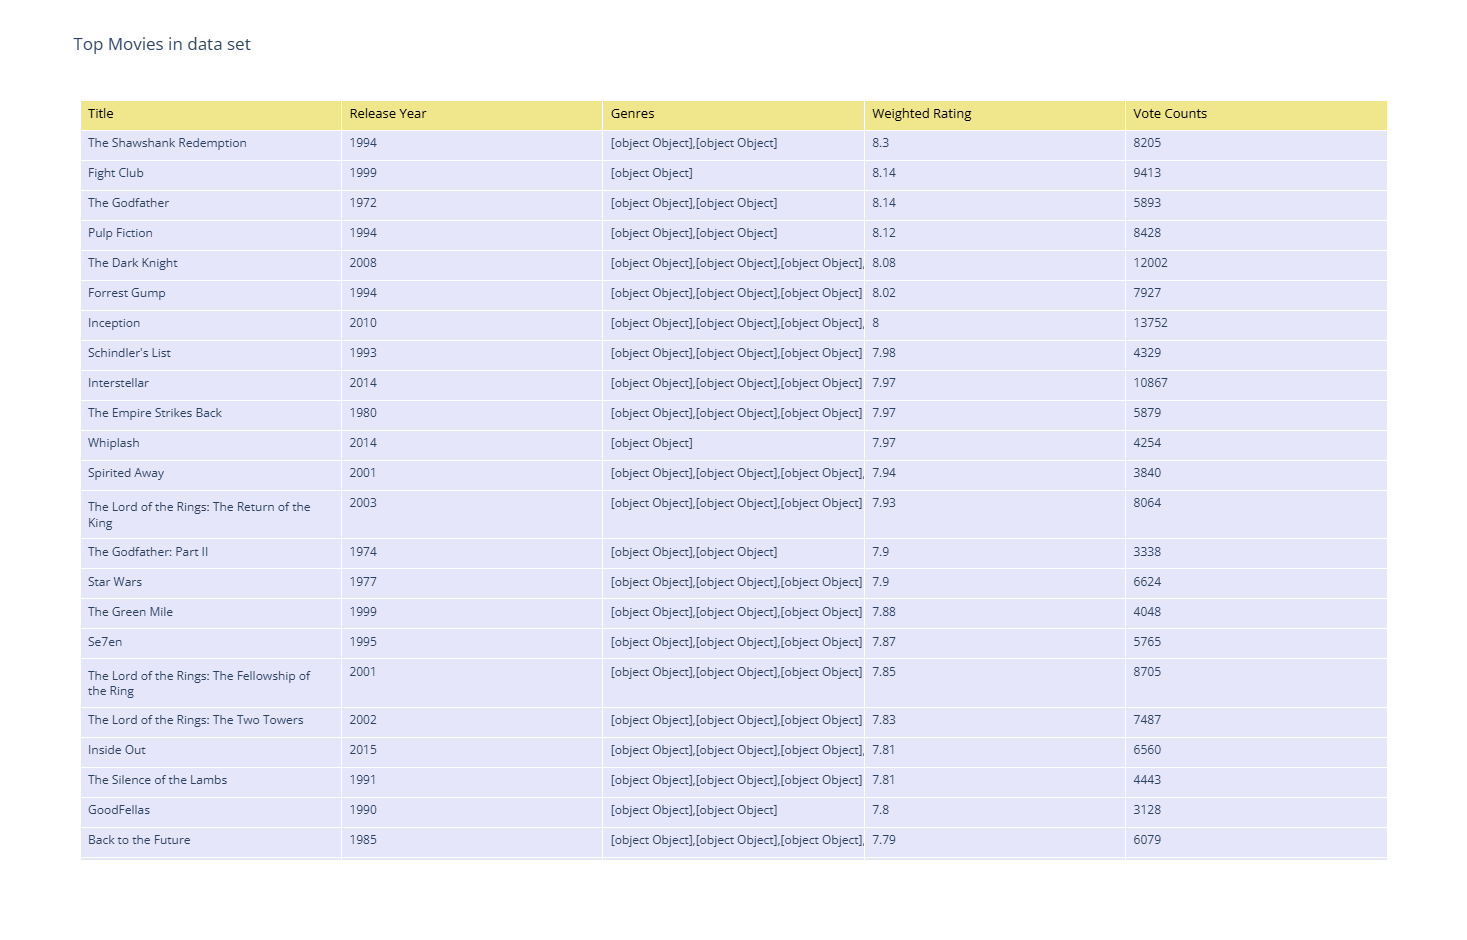

In [22]:
toprated_weighted = kaggle_movies[[ "title", "release_year", "genres", "weighted_rating", "vote_count" ]].sort_values(by = "weighted_rating", ascending=False)

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year', "Genres", 'Weighted Rating', 'Vote Counts'],fill_color='Khaki',height=30,align='left',font=dict(color='black', size=13)),
                              cells = dict(values=[toprated['title'], toprated['release_year'], toprated['genres'], toprated['weighted_rating'], toprated['vote_count']],fill_color='lavender',height=30,align='left'))])
fig.update_layout(height=940, width=850, title_text="Top Movies in data set")
fig.show()

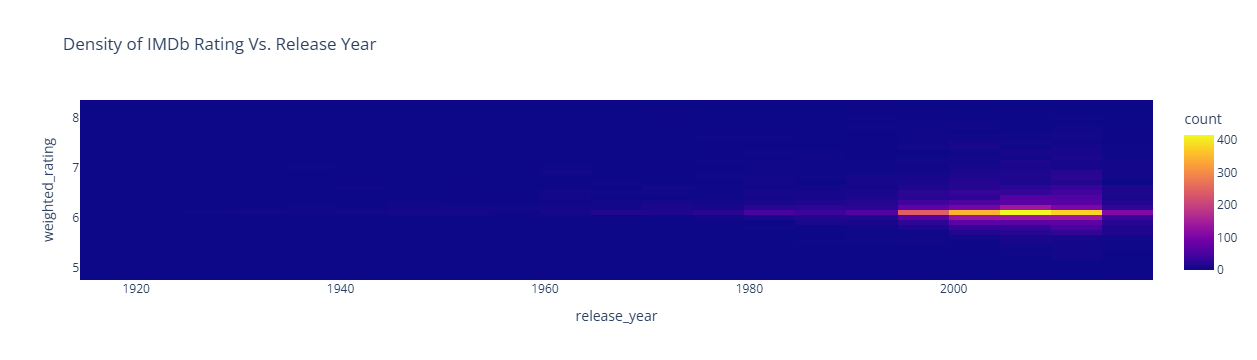

In [24]:
fig = px.density_heatmap(toprated_weighted, x="release_year", y="weighted_rating", title = 'Density of IMDb Rating Vs. Release Year')
fig.show()

In [89]:
toprated

title  release_year  \
3519           Stiff Upper Lips          1998   
4247      Me You and Five Bucks          2015   
4045      Dancer, Texas Pop. 81          1998   
4662             Little Big Top          2006   
3992                  Sardaarji          2015   
...                         ...           ...   
4633                Death Calls          2010   
4508   The Harvest (La Cosecha)          2011   
4710  Antarctic Edge: 70° South          2015   
4068                  Sharkskin          2015   
4708             Heroes of Dirt          2015   

                                                 genres  vote_average  \
3519                     [{'id': 35, 'name': 'Comedy'}]          10.0   
4247  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...          10.0   
4045  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...          10.0   
4662                     [{'id': 35, 'name': 'Comedy'}]          10.0   
3992                                                 []           9.5   
...                                                 ...           ...   
4633                                                 []           0.0   
4508                [{'id': 99, 'name': 'Documentary'}]           0.0   
4710                [{'id': 99, 'name': 'Documentary'}]           0.0   
4068                                                 []           0.0   
4708  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...           0.0   

      vote_count  
3519           1  
4247           2  
4045           1  
4662           1  
3992           2  
...          ...  
4633           0  
4508           0  
4710           0  
4068           0  
4708           0  

[4802 rows x 5 columns]

## Korrektur des Votings
Problem: Top-Rated Filme haben zT sehr wenige Votes. Deshalb Korrektur notwendig!
Vorlage: https://www.kaggle.com/code/erikbruin/movie-recommendation-systems-for-tmdb#4%20Recommend%20movies

W=R∗v+C∗mv+m

Where:

W = weighted rating
R = average rating for the movie as a number from 1 to 10 (vote_average)
v = number of votes for the movie (vote_count)
m = minimum votes required to be listed in the Top 250 (currently 25,000)
C = the mean vote across the whole report

In [16]:
R = toprated["vote_average"]
v = toprated["vote_count"]
m = kaggle_movies["vote_count"].quantile(0.75)
C = kaggle_movies["vote_average"].mean() 

In [17]:
W = (R * v + C * m) / (v + m)

In [18]:
kaggle_movies["weighted_rating"] = W
kaggle_movies["weighted_rating"] = kaggle_movies["weighted_rating"].round(2)

In [107]:
kaggle_movies.head(50)

budget                                             genres  \
0   237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
1   300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2   245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
3   250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4   260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
5   258000000  [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
6   260000000  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
7   280000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
8   250000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
9   250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
10  270000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
11  200000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
12  200000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
13  255000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
14  225000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
15  225000000  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
16  220000000  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
17  380000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
18  225000000  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
19  250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
20  215000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
21  200000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
22  250000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
23  180000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
24  207000000  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
25  200000000  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
26  250000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
27  209000000  [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...   
28  150000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
29  200000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
30  200000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
31  200000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
32  200000000  [{'id': 10751, 'name': 'Family'}, {'id': 14, '...   
33  210000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
34  200000000  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
35  150000000  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
36  210000000  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
37  200000000  [{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...   
38  200000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
39  170000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
40  200000000  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
41  200000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
42  200000000  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
43  200000000  [{'id': 28, 'name': 'Action'}, {'id': 878, 'na...   
44  190000000                     [{'id': 28, 'name': 'Action'}]   
45  200000000  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
46  250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
47  190000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
48  195000000  [{'id': 28, 'name': 'Action'}, {'id': 10751, '...   
49  105000000  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   

                                             homepage      id  \
0                         http://www.avatarmovie.com/   19995   
1        http://disney.go.com/disneypictures/pirates/     285   
2         http://www.sonypictures.com/movies/spectre/  206647   
3                  http://www.thedarkknightrises.com/   49026   
4                http://movies.disney.com/john-carter   49529   
5     http://www.sonypictures.com/movies/spider-man3/     559   
6        http://disney.go.com/disneypictures/tangled/   38757   
7   http://marvel.